In [1]:
import pandas as pd

/Users/judebuenaseda/.pyenv/versions/3.8.2/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
test = pd.read_csv('farmersmarkets.csv')

In [18]:
test['num_market'] = 1

In [19]:
test['num_market']

0       1
1       1
2       1
3       1
4       1
       ..
8650    1
8651    1
8652    1
8653    1
8654    1
Name: num_market, Length: 8655, dtype: int64

In [20]:
#test['county']['num_market']

In [29]:
test[test['num_market']==1].count()

fmid             8655
marketname       8655
website          5180
facebook         3459
twitter           996
youtube           161
othermedia        636
street           8372
city             8615
county           8118
state            8655
zip              7714
season1date      5386
season1time      5519
season2date       429
season2time       414
season3date        78
season3time        74
season4date         7
season4time         7
x                8626
y                8626
location         2922
credit           8655
wic              8655
wiccash          8655
sfmnp            8655
snap             8655
organic          8655
bakedgoods       5635
cheese           5635
crafts           5635
flowers          5635
eggs             5635
seafood          5635
herbs            5635
vegetables       5635
honey            5635
jams             5635
maple            5635
meat             5635
nursery          5635
nuts             5635
plants           5635
poultry          5635
prepared  

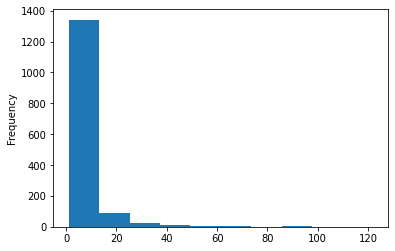

In [47]:
test.groupby('county')['num_market'].sum().plot(kind='hist')

In [44]:
test.groupby('county')['num_market'].sum()

county
ALAMEDA       2
Abbeville     1
Accomack      3
Ada           7
Adair         3
             ..
Yolo          6
York         25
Yuba          2
Yuma          1
midland       1
Name: num_market, Length: 1487, dtype: int64